<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cd /Users/imac/DAT07-28-AG/Homework/Unit2/data/

/Users/imac/DAT07-28-AG/Homework/Unit2/data


#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [3]:
movies = pd.read_csv("/Users/imac/DAT07-28-AG/Homework/Unit2/data/imdb_1000.csv")
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [4]:
count_rows = movies.shape[0]
count_cols = movies.shape[1]

In [5]:
count_rows

979

In [6]:
count_cols

6

#### Check the data type of each column.

In [7]:
col_types = movies.dtypes
col_types

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [8]:
avg_duration = movies["duration"].mean()
avg_duration

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [9]:
movies.sort_values(["duration"], ascending=False)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
...,...,...,...,...,...,...
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

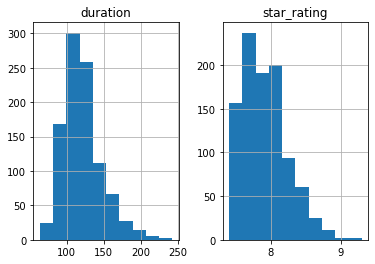

In [10]:
# check current bins in histograms
movies.hist();

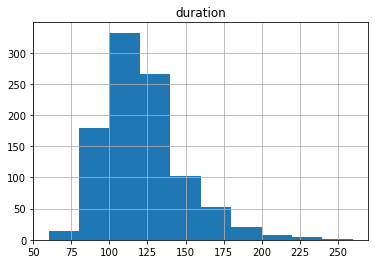

In [11]:
# set number of bins for duration histogram. 
# There are 979 entries and data range is 64 to 242. 
# Rounding up to 60 and 250: 250 - 60 = 190. 190 / 10 bins = 19 mins per bin. Round up to 20 mins.
# create list of 10 bins, setting the intervals every 20 mins
bins_list = [60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260]
ax = movies.hist(["duration"], bins=bins_list)

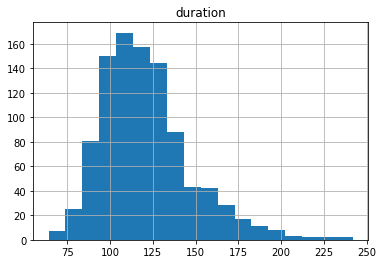

In [12]:
# check to see if bins at 10 minute intervals is more revealing
# creating bins list at 10 minute intervals is more time consuming, so applying a different method. 
# find the range of durations in movies. 
dur_range = movies["duration"].max() - movies["duration"].min()

# set width of bin in minutes
width = 10

#divide duration range by bin width
dur_range = dur_range/width

# round up to nearest whole number
import math
num_bins = math.ceil(dur_range)

#create histogram with bins at 10 minute intervals
duration_hist = movies.hist(["duration"], bins=num_bins)

In [13]:
# set number of bins for star ratings histogram. 
# There are 979 entries 
# check data range

movies.sort_values(["star_rating"], ascending=False)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
948,7.4,Frances Ha,R,Comedy,86,"[u'Greta Gerwig', u'Mickey Sumner', u'Adam Dri..."
949,7.4,Home Alone,PG,Comedy,103,"[u'Macaulay Culkin', u'Joe Pesci', u'Daniel St..."
950,7.4,Bound,R,Crime,108,"[u'Jennifer Tilly', u'Gina Gershon', u'Joe Pan..."
951,7.4,Sleepy Hollow,R,Drama,105,"[u'Johnny Depp', u'Christina Ricci', u'Miranda..."


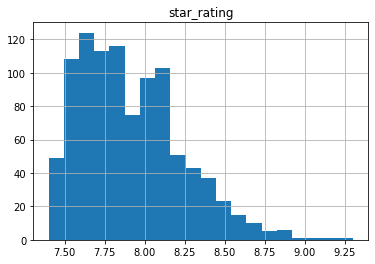

In [14]:
# star_rating range is 7.4 to 9.3. Intervals at 0.1 would give 19 bins.
# Using same method as before:
import math
w = 0.1
num_bins_ratings = math.ceil((movies["star_rating"].max() - movies["star_rating"].min())/w)
ratings_hist = movies.hist(["star_rating"], bins=num_bins_ratings)

#### Use a box plot to display that same data.

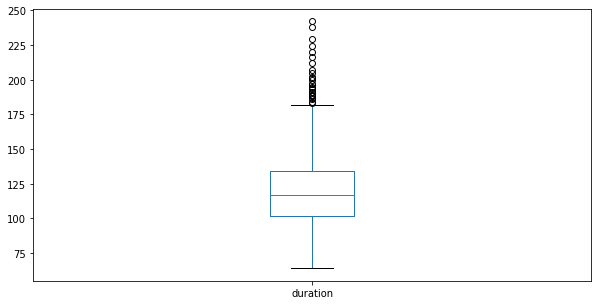

In [15]:
movies["duration"].plot.box(figsize=(10,5));

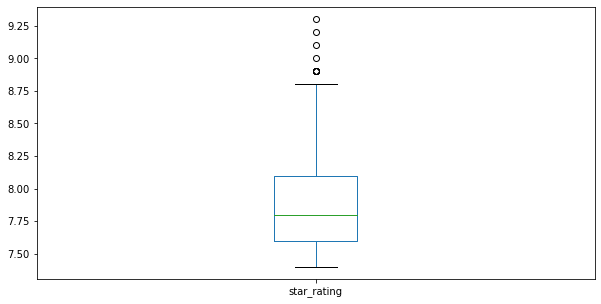

In [16]:
movies["star_rating"].plot.box(figsize=(10,5));

## Intermediate level

#### Count how many movies have each of the content ratings.

In [17]:
count_content_ratings = movies.groupby("content_rating").agg({"title": "count"})
count_content_ratings

,title
content_rating,
APPROVED,47
G,32
GP,3
NC-17,7
NOT RATED,65
PASSED,7
PG,123
PG-13,189
R,460


In [18]:
# rename title column for clarity
count_content_ratings.rename({"title": "count_content_rating"}, axis=1, inplace=True)

In [19]:
count_content_ratings

,count_content_rating
content_rating,
APPROVED,47
G,32
GP,3
NC-17,7
NOT RATED,65
PASSED,7
PG,123
PG-13,189
R,460


#### Use a visualization to display that same data, including a title and x and y labels.

In [20]:
#reorder highest to lowest
count_content_ratings = count_content_ratings.sort_values(["count_content_rating"], ascending=False)
count_content_ratings

,count_content_rating
content_rating,
R,460
PG-13,189
PG,123
NOT RATED,65
APPROVED,47
UNRATED,38
G,32
NC-17,7
PASSED,7


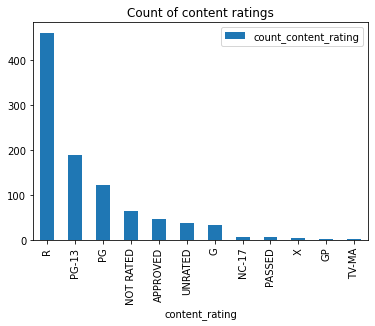

In [21]:
bar_count_content_ratings = count_content_ratings.plot.bar(title="Count of content ratings")

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [22]:
# replace content ratings with unrated
movies.replace(to_replace=["NOT RATED", "APPROVED", "PASSED", "GP"], value=["UNRATED", "UNRATED", "UNRATED", "UNRATED"], inplace=True)

In [23]:
# sort values to check values have been replaced
movies = movies.sort_values(["content_rating"], ascending=False)
movies

,star_rating,title,content_rating,genre,duration,actors_list
86,8.4,A Clockwork Orange,X,Crime,136,"[u'Malcolm McDowell', u'Patrick Magee', u'Mich..."
486,7.8,Evil Dead II,X,Comedy,84,"[u'Bruce Campbell', u'Sarah Berry', u'Dan Hicks']"
387,8.0,Midnight Cowboy,X,Drama,113,"[u'Dustin Hoffman', u'Jon Voight', u'Sylvia Mi..."
913,7.5,Suspiria,X,Horror,92,"[u'Jessica Harper', u'Stefania Casini', u'Flav..."
445,7.9,The Ten Commandments,UNRATED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
...,...,...,...,...,...,...
168,8.2,Hachi: A Dog's Tale,G,Drama,93,"[u'Richard Gere', u'Joan Allen', u'Cary-Hiroyu..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [25]:
#repeat same method for NC-17
movies.replace(to_replace=["X", "TV-MA"], value=["NC-17", "NC-17"], inplace=True)
movies

,star_rating,title,content_rating,genre,duration,actors_list
86,8.4,A Clockwork Orange,NC-17,Crime,136,"[u'Malcolm McDowell', u'Patrick Magee', u'Mich..."
486,7.8,Evil Dead II,NC-17,Comedy,84,"[u'Bruce Campbell', u'Sarah Berry', u'Dan Hicks']"
387,8.0,Midnight Cowboy,NC-17,Drama,113,"[u'Dustin Hoffman', u'Jon Voight', u'Sylvia Mi..."
913,7.5,Suspiria,NC-17,Horror,92,"[u'Jessica Harper', u'Stefania Casini', u'Flav..."
445,7.9,The Ten Commandments,UNRATED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
...,...,...,...,...,...,...
168,8.2,Hachi: A Dog's Tale,G,Drama,93,"[u'Richard Gere', u'Joan Allen', u'Cary-Hiroyu..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."


In [26]:
#check values have been replaced
count_content_ratings = movies.groupby("content_rating").agg({"title": "count"})
count_content_ratings

,title
content_rating,
G,32
NC-17,12
PG,123
PG-13,189
R,460
UNRATED,160


#### Count the number of missing values in each column.

In [27]:
# check which values are missing & store as new DF
movies_null = movies.isnull()
movies_null

,star_rating,title,content_rating,genre,duration,actors_list
86,False,False,False,False,False,False
486,False,False,False,False,False,False
387,False,False,False,False,False,False
913,False,False,False,False,False,False
445,False,False,False,False,False,False
...,...,...,...,...,...,...
168,False,False,False,False,False,False
157,False,False,False,False,False,False
187,False,False,True,False,False,False
649,False,False,True,False,False,False


In [28]:
# count number of missing values per column
movies_null.sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [29]:
# fill blanks with alternative entry
movies = movies.fillna("Missing")
movies

,star_rating,title,content_rating,genre,duration,actors_list
86,8.4,A Clockwork Orange,NC-17,Crime,136,"[u'Malcolm McDowell', u'Patrick Magee', u'Mich..."
486,7.8,Evil Dead II,NC-17,Comedy,84,"[u'Bruce Campbell', u'Sarah Berry', u'Dan Hicks']"
387,8.0,Midnight Cowboy,NC-17,Drama,113,"[u'Dustin Hoffman', u'Jon Voight', u'Sylvia Mi..."
913,7.5,Suspiria,NC-17,Horror,92,"[u'Jessica Harper', u'Stefania Casini', u'Flav..."
445,7.9,The Ten Commandments,UNRATED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
...,...,...,...,...,...,...
168,8.2,Hachi: A Dog's Tale,G,Drama,93,"[u'Richard Gere', u'Joan Allen', u'Cary-Hiroyu..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
187,8.2,Butch Cassidy and the Sundance Kid,Missing,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,Missing,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [30]:
# sort movies into longer than 2 hours and shorter than 2 hours
movies_long = movies[movies["duration"] >= 120]
movies_short = movies[movies["duration"] < 120]

In [31]:
# check average star rating of long movies 
movies_long["star_rating"].mean()

7.948898678414088

In [32]:
# check average star rating of short movies 
movies_short["star_rating"].mean()

7.838666666666659

In [33]:
# longer movies have a higher star rating on average

In [ ]:
# Use a visualization to detect whether there is a relationship between duration and star rating.

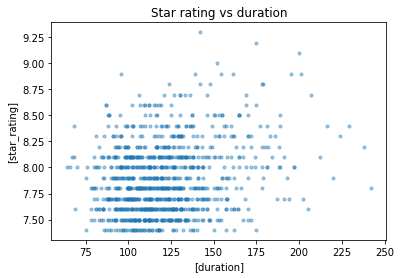

In [34]:
# very weak positive correlation betwen duration and ratings
movies.plot.scatter(x=["duration"], y=["star_rating"], title="Star rating vs duration", alpha = 0.4, s=10);

#### Calculate the average duration for each genre.

In [35]:
# use same method as was used to count titles and apply to average durations
genre_duration = movies.groupby("genre").agg({"duration": "mean"})
genre_duration

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

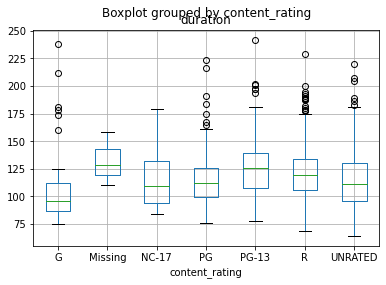

In [36]:
#using boxplot 

movies.boxplot(column="duration", by="content_rating");

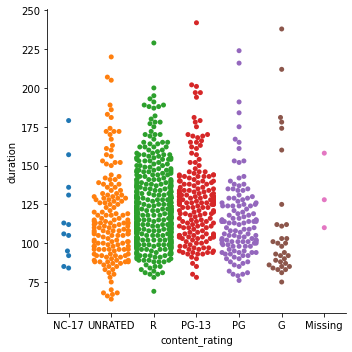

In [37]:
# using seaborn for more options with boxplots

import seaborn as sns

sns.catplot(x="content_rating", y="duration", kind="swarm", data=movies);

#### Determine the top rated movie (by star rating) for each genre.

In [38]:
# group by genre, find max rating and corresponding title
movies.groupby(["genre"])[["star_rating", "title"]].max()

,star_rating,title
genre,,
Action,9.0,Yojimbo
Adventure,8.9,True Grit
Animation,8.6,Wreck-It Ralph
Biography,8.9,Walk the Line
Comedy,8.6,Zombieland
Crime,9.3,Zodiac
Drama,8.9,Zulu
Family,7.9,Willy Wonka & the Chocolate Factory
Fantasy,7.7,The City of Lost Children


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [39]:
# check if there are any duplicate titles and store as df; these are note duplicate entries
duplicate_titles = movies[movies["title"].duplicated(keep=False)]
duplicate_titles

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,Missing,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [40]:
genres = movies["genre"].value_counts()
genres

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [41]:
type(genres)

pandas.core.series.Series

In [ ]:
# trim genres series to include only those with more than 10 movies
genres = genres[genres_10]
genres

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [42]:
# count the values in genre, keeping only the ones twhere tere are more than 10 values 
genres_10 = movies["genre"].value_counts() > 10
# convert to a dataframe
genres_10 = genres_10.to_frame()
# create a list of the genres that have more than 10 movies  
movies_10 = genres_10[genres_10["genre"] == True].index.tolist()
# create a boolean of the result if the genres are in the movies dataframe
new_query = movies["genre"].isin(movies_10)
new_query

86     True
486    True
387    True
913    True
445    True
       ... 
168    True
157    True
187    True
649    True
936    True
Name: genre, Length: 979, dtype: bool

In [45]:
# pass the new_query boolean into the movies dataframe, group by genre and find the average rating
movies[new_query].groupby(["genre"])["star_rating"].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [47]:
# find the average star rating
ave_star_rating = movies.groupby(["genre"])[["star_rating"]].mean()
ave_star_rating

,star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Family,7.850000
Fantasy,7.700000


In [53]:
# create boolean to of whether the genre has more than 10 movies
genres_more_than_10 = genres > 10
genres_more_than_10

Drama         True
Comedy        True
Action        True
Crime         True
Biography     True
Adventure     True
Animation     True
Horror        True
Mystery       True
Western      False
Sci-Fi       False
Thriller     False
Film-Noir    False
Family       False
History      False
Fantasy      False
Name: genre, dtype: bool

In [54]:
#filter the average rating dataframe by the new boolean
ave_star_rating[genres_more_than_10]

<ipython-input-54-8b3d4a0a6504>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ave_star_rating[genres_more_than_10]


,star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Horror,7.806897
Mystery,7.975000


#### Option 4: aggregate by count and mean, then filter using the count

In [48]:
#group by genre, aggregating by count and mean
ave_rating_genre = movies.groupby(["genre"]).agg({"title": "count", "star_rating": "mean"})

# sort by number of titles 
ave_rating_genre = ave_rating_genre.sort_values(["title"], ascending=False)
ave_rating_genre

,title,star_rating
genre,,
Drama,278,7.902518
Comedy,156,7.822436
Action,136,7.884559
Crime,124,7.916935
Biography,77,7.862338
Adventure,75,7.933333
Animation,62,7.914516
Horror,29,7.806897
Mystery,16,7.975000


In [49]:
# rename title column for clarity
ave_rating_genre.rename({"title": "num_movies"}, axis=1, inplace=True)

# trim dataframe so only genres with more than 1 movies are captured
ave_rating_genre = ave_rating_genre[ave_rating_genre["num_movies"] >= 10]
ave_rating_genre

,num_movies,star_rating
genre,,
Drama,278,7.902518
Comedy,156,7.822436
Action,136,7.884559
Crime,124,7.916935
Biography,77,7.862338
Adventure,75,7.933333
Animation,62,7.914516
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!